<a href="https://colab.research.google.com/github/Bhanukoya/Tree-based-Algorithms/blob/master/Decision_tree_mammogarphic_masses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Applying Decision tree to predict whether a mammogram mass is benign or malignant

I will be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 samples of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1,  oval=2, lobular=3, irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1, microlobulated=2, obscured=3, ill-defined=4, spiculated=5 (nominal)
   5. Density: mass density high=1, iso=2, low=3, fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   






## Importing data

Started by importing the mammographic_masses.data.txt file into a Pandas dataframe and examined it.

In [26]:
import pandas as pd

masses_data = pd.read_csv('mammographic_masses.data')
masses_data.head()

,5,67,3,5.1,3.1,1
0,4,43,1,1,?,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,74,1,5,?,1
4,4,65,1,?,3,0


In [27]:
masses_data = pd.read_csv('mammographic_masses.data', na_values=['?'], 
                          names = ['BI-RADS', 'age', 'shape', 'margin', 'density', 'severity'])
masses_data.head()

,BI-RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


Evaluating to see whether the data needs any cleaning.

In [28]:
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


Handling missing values by  dropping the rows using dropna().

In [29]:
masses_data.dropna(inplace=True)
masses_data.describe()

,BI-RADS,age,shape,margin,density,severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


BI-RADS is an assesment of how confident the severity classification is. It is not a  good predictive attribute and so it is not taken as input. 

Creating Inputs and outputs for the algorithm. created an array that contains only the feature data we want to work with (age, shape, margin, and density) and another array that contains the classes (severity). 

In [30]:
all_features = masses_data[['age', 'shape',
                             'margin', 'density']].values


all_classes = masses_data['severity'].values

feature_names = ['age', 'shape', 'margin', 'density']

all_features

array([[67.,  3.,  5.,  3.],
       [58.,  4.,  5.,  3.],
       [28.,  1.,  1.,  3.],
       ...,
       [64.,  4.,  5.,  3.],
       [66.,  4.,  5.,  3.],
       [62.,  3.,  3.,  3.]])

Normalizing the inputs

In [31]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)
all_features_scaled

array([[ 0.7650629 ,  0.17563638,  1.39618483,  0.24046607],
       [ 0.15127063,  0.98104077,  1.39618483,  0.24046607],
       [-1.89470363, -1.43517241, -1.157718  ,  0.24046607],
       ...,
       [ 0.56046548,  0.98104077,  1.39618483,  0.24046607],
       [ 0.69686376,  0.98104077,  1.39618483,  0.24046607],
       [ 0.42406719,  0.17563638,  0.11923341,  0.24046607]])

## Decision Trees

Started by creating a single train/test split of our data. Set aside 75% for training, and 25% for testing.

In [32]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1234)

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_features_scaled, all_classes, test_size=0.25, random_state=1)

Now creating a DecisionTreeClassifier and fit it to your training data.

In [33]:
from sklearn.tree import DecisionTreeClassifier

clf= DecisionTreeClassifier(random_state=1, max_depth=3,criterion='gini')

# Training the classifier on the training set
clf.fit(training_inputs, training_classes)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Checking the resulting decision tree.

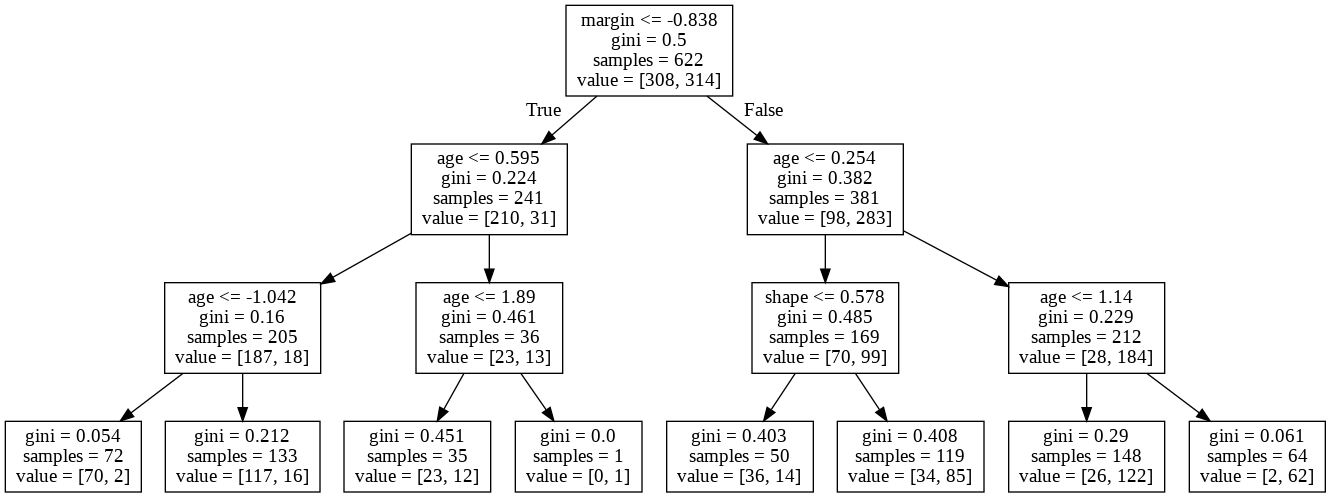

In [34]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn import tree
from pydotplus import graph_from_dot_data 

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_names)  
graph = graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

Measuring the accuracy of the resulting decision tree model using your test data.

In [35]:
clf.score(testing_inputs, testing_classes)

0.7548076923076923

Now instead of a single train/test split, using K-Fold cross validation to get a better measure of your model's accuracy. 

In [36]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=1, max_depth=3, criterion="entropy")

cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
print(cv_scores)
cv_scores.mean()

[0.73493976 0.79518072 0.84337349 0.80722892 0.84337349 0.75903614
 0.79518072 0.79518072 0.85542169 0.74698795]


0.7975903614457831

## KNN
Applying K-Nearest-Neighbors and comparing it with decision tree results

In [37]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=7)
cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)

cv_scores.mean()

0.7951807228915662

In [38]:
for n in range(1, 15):
    clf = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.7325301204819278
2 0.6903614457831325
3 0.7542168674698796
4 0.7349397590361446
5 0.7710843373493976
6 0.7686746987951807
7 0.7951807228915662
8 0.7771084337349398
9 0.7903614457831326
10 0.7915662650602409
11 0.7891566265060241
12 0.783132530120482
13 0.7879518072289157
14 0.7867469879518072


In [39]:
for n in range(1, 15):
    clf = DecisionTreeClassifier(random_state=1, max_depth=n)
    cv_scores = cross_val_score(clf, all_features_scaled, all_classes, cv=10)
    print (n, cv_scores.mean())

1 0.7795180722891566
2 0.7771084337349397
3 0.7951807228915662
4 0.7843373493975904
5 0.7951807228915662
6 0.7843373493975904
7 0.7783132530120482
8 0.7771084337349398
9 0.7626506024096386
10 0.7590361445783133
11 0.7638554216867469
12 0.7481927710843373
13 0.7481927710843373
14 0.7457831325301204


Both have given the same accuracy for this mammographic masses Dataset